#### Распределение $\chi^2$

Пусть $ \zeta_1, ..., \zeta_k \sim N(0, 1)  $, взаимно независимы. Распределение случайной величины

$  \tau =  \zeta^2_1 + ... + \zeta^2_k$ называется распределение хи-квадрат с $k$ степенями свободы, где $k$ это число сл. вел. $ \zeta $ вошедших в сумму.

Функция распределения представляет собой гамма распределение c параметрами $ Г(\frac{k}{2}, \frac{1}{2})  $

Плотность распределения

$ f_\tau(x) =  \begin{cases}
                (\frac{1}{2})^{\frac{k}{2}} \frac{x^{\frac{k}{2} - 1}}{Г(\frac{k}{2})} e^{- \frac{x}{2}},  x > 0 ,
                \\
                0, x \leq 0.
              \end{cases} $


#### Распределение Стьюдента

Пусть $ \zeta \sim N(0,1) $ и $ \tau_k \sim \chi^2_k $ взаимно независимы

Распределение случайной величины $ \xi = \frac{\zeta}{\sqrt{\frac{\tau_k}{k}}} $

называется распределением Стьюдента с $к$ степенями свободы.

Обозначение сл. вел. с распределением Стьдента $T_k$ или $T(k)$

Плотность распределения

$ f(z) = \frac{Г(\frac{k+1}{2})}{\sqrt{\pi k}Г(\frac{k}{2})} \cdot \frac{1}{(1 + \frac{z^2}{k})^{\frac{k+1}{2}}} $

если $ k \rightarrow + \infty$, то

$ f(z) \rightarrow  N(0, 1)$

Свойства квантилей:

Т.к. распределение является симметричным

$t_\alpha(k) = -t_{1-\alpha}(k)$

Например, Квантиль распределения Стьюдента с k степенями свободы порядка  0.8  примерно равна 0.85. Найдите квантиль распределения Стьюдента с k степенями свободы порядка 0.2.

$ t_{0.8}(k) = 0.85 $, т.к. $t_\alpha(k) = -t_{1-\alpha}(k)$, то

$ t_{0.8}(k) = - t_{1-0.8}(k) = -0.85$


#### Распределение Фишера

Пусть $ \eta \sim \chi^2_m  $, $ \xi \sim  \chi^2_n $ независимы. Будем говорить, что сл. вел

$ \zeta = \frac{\frac{\eta}{m}}{\frac{\xi}{n}} $ подчиняется закону распределения Фишера со степенями свободы числителя $m$ и знаменателя $n$.

Плотность распределения $\zeta$:

$ f_\tau(x) =  \begin{cases}
                \frac{Г(\frac{m+n}{2})}{Г \frac{m}{2} U \frac{n}{2}} \cdot \frac{m^{\frac{m}{2}} n^{\frac{n}{2}} z^{\frac{m}{2} - 1} }{(n + m z)^{\frac{m+n}{2}}},  z > 0 ,
                \\
                0, z \leq 0.
              \end{cases} $

Свойства квантилей:

$ F_\alpha(m,n) = \frac{1}{1 - F_{1-\alpha}(m, n)}$

#### Задача №1. Вычислить квантиль Фишера с 5 и 15 степенями свободы порядка 0.9

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

Квантиль [определение](http://www.machinelearning.ru/wiki/index.php?title=Квантиль).

$ \alpha $ (порядок, степень доверия) - с какой вер-ю число меньшее квантили не превзойдёт квантиль.

In [3]:
# p - порядок или степень доверия, вер-ть с которой 
alpha = 0.9
dfn, dfm= 5, 15
stats.f.ppf(alpha, dfn, dfm)

2.273022447867572

**Ответ:**

$x_\alpha = 2.27$

Построим [распределение Фишера](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html) с нашими параметрами

In [18]:
from scipy.stats import f

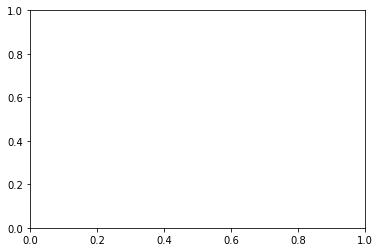

In [44]:
# создадим одно полотно на который будем наносить графики
fig, ax = plt.subplots(1, 1)

In [45]:
# можно вычислить необходимые статистики
dfn, dfm= 5, 15
mean, var, skew, kurt = f.stats(dfn, dfm, moments='mvsk')

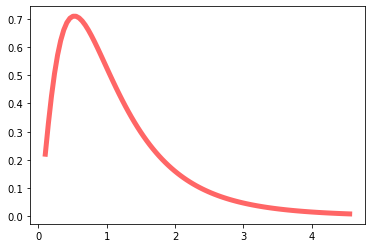

In [48]:
# Display the probability density function (pdf)

x = np.linspace(f.ppf(0.01, dfn, dfm),
                f.ppf(0.99, dfn, dfm), 100)

plt.plot(x, f.pdf(x, dfn, dfm),
       'r-', lw=5, alpha=0.6, label='f pdf');

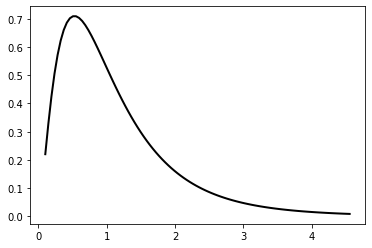

In [40]:
# Freeze the distribution and display the frozen pdf:

rv = f(dfn, dfm)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf');

In [41]:
# Generate random numbers:
r = f.rvs(dfn, dfm, size=1000)

No handles with labels found to put in legend.


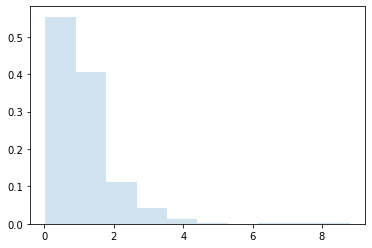

In [42]:
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)

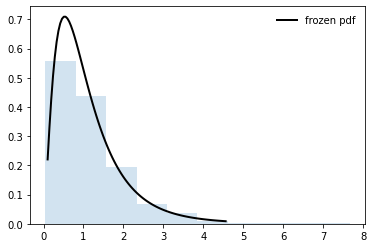

In [50]:
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False);